# Kwantylowa adaptacja parametru $\sigma$

In [9]:
library(tidyverse)
library(magrittr)
library(furrr)
install.packages("cec2013")
source("../src/cma-es/cma-es-sigma-quant.R")
source("../src/cma-es/cma-es-onefifth-sigma.R")
source("../src/eval-funcs.R")
source("../src/exp-utils.R")
source("../src/data-utils.R")
source("../src/plot-funcs.R")
source("../src/quantile-utils.R")
options(repr.plot.width=10, repr.plot.height=10)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



## Eksperyment

* `no_cma_es_no_sigma()`: CMA-ES ze stałą $\sigma$ i macierzą kowariancji $I_N$
* `no_cma_es()`: CMA-ES z adaptacją $\sigma$ wg CSA i macierzą kowariancji $I_N$
* `no_cma_es_no_sigma_down()`: CMA-ES z "kwantylową" adaptacją $\sigma$ i macierzą kowariancji $I_N$


1. $\lambda$ =  $4N$
2. maxit = 1000
3. $x \in [-1000, 1000]^{10}$



In [4]:
gutter_eval10 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                gutter_func,
                10,
                1000,
                lower = -1000,
                upper = 1000)

ERROR: Error in do_experiment(list(no_cma_es_no_sigma, no_cma_es, no_cma_es_onefifth_sigma, : could not find function "do_experiment"


In [5]:
sphere_eval10 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                sphere_func,
                100,
                1000,
                lower = -1000,
                upper = 1000)

ERROR: Error in do_experiment(list(no_cma_es_no_sigma, no_cma_es, no_cma_es_onefifth_sigma, : could not find function "do_experiment"


In [6]:
linear_eval10 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                linear_func,
                10,
                1000,  
                lower = -1000,
                upper = 1000)

ERROR: Error in do_experiment(list(no_cma_es_no_sigma, no_cma_es, no_cma_es_onefifth_sigma, : could not find function "do_experiment"


In [69]:
gutter_eval50 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                gutter_func,
                50,
                1000,
                lower = -1000,
                upper = 1000)

In [70]:
sphere_eval50 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                sphere_func,
                50,
                1000,
                lower = -1000,
                upper = 1000)

In [71]:
linear_eval50 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                linear_func,
                50,
                1000,  
                lower = -1000,
                upper = 1000)

In [72]:
gutter_eval100 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                gutter_func,
                100,
                1000,
                lower = -1000,
                upper = 1000)

In [73]:
sphere_eval100 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                sphere_func,
                100,
                1000,
                lower = -1000,
                upper = 1000)

In [74]:
linear_eval100 = 
  do_experiment(
                list(no_cma_es_no_sigma,
                     no_cma_es,
                     no_cma_es_onefifth_sigma,
                     no_cma_es_sigma_quant),
                linear_func,
                100,
                1000,  
                lower = -1000,
                upper = 1000)

## Krzywe zbieżności

### Funkcja gutter $q(x) = x_1 + \sum^{\lambda}_{i = 2}x^{2}_{i}$

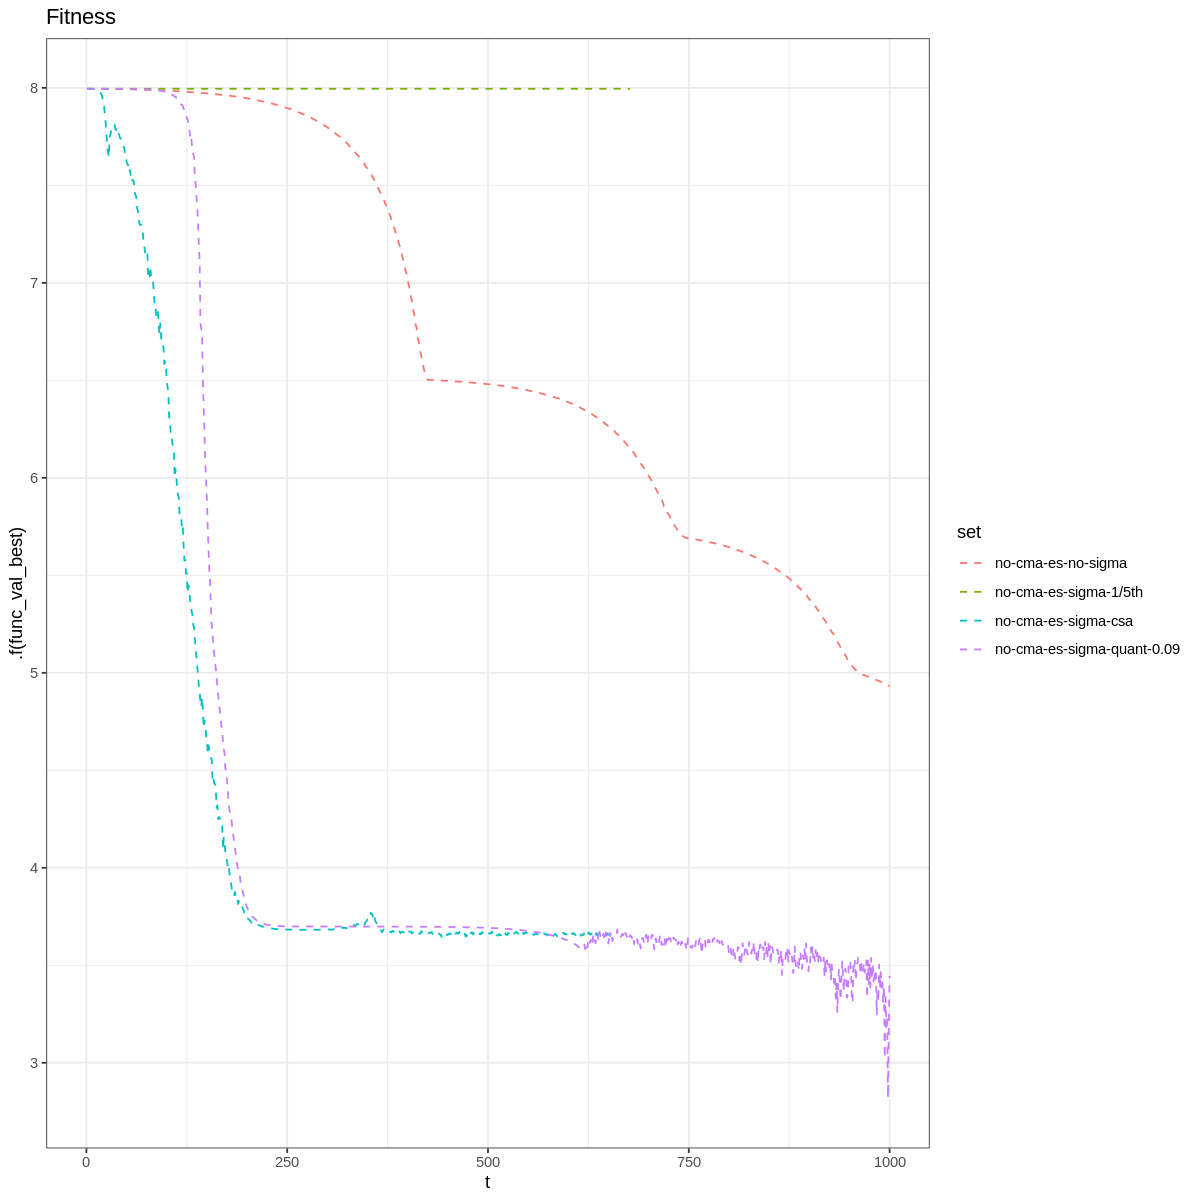

In [95]:
#gutter_eval10 %>% value_plot()
gutter_eval100 %>% mutate(func_val_best = func_val_best + 5000) %>% value_plot(.f=log10)
#gutter_eval10 %>% filter(set == "no-cma-es-sigma-csa") %>% 

### Funkcja sferyczna $q(x) = x^{T}x$

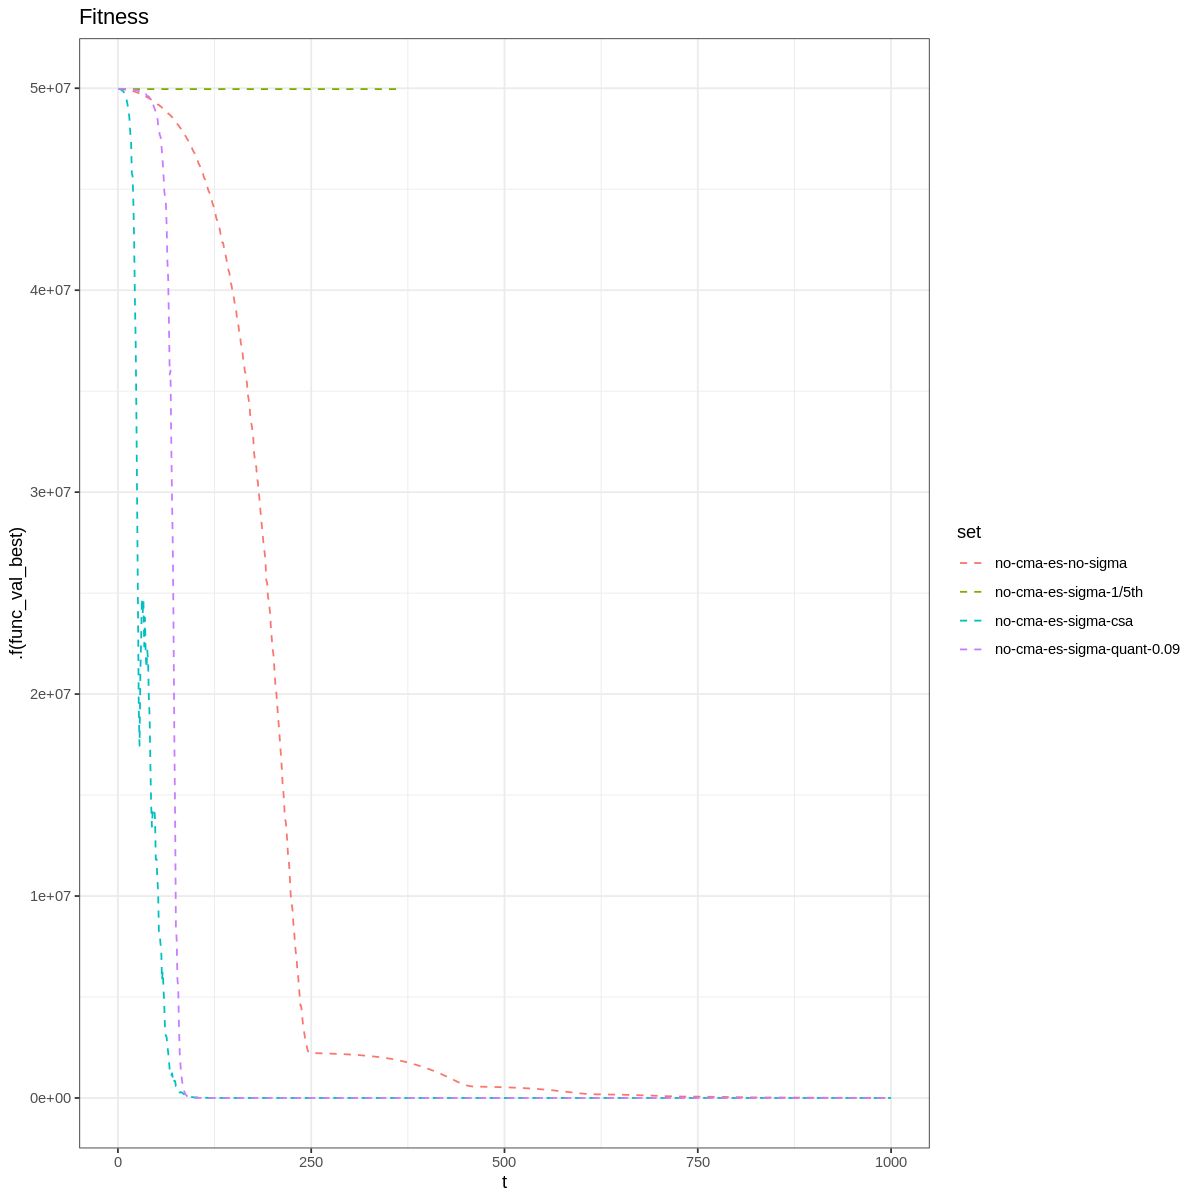

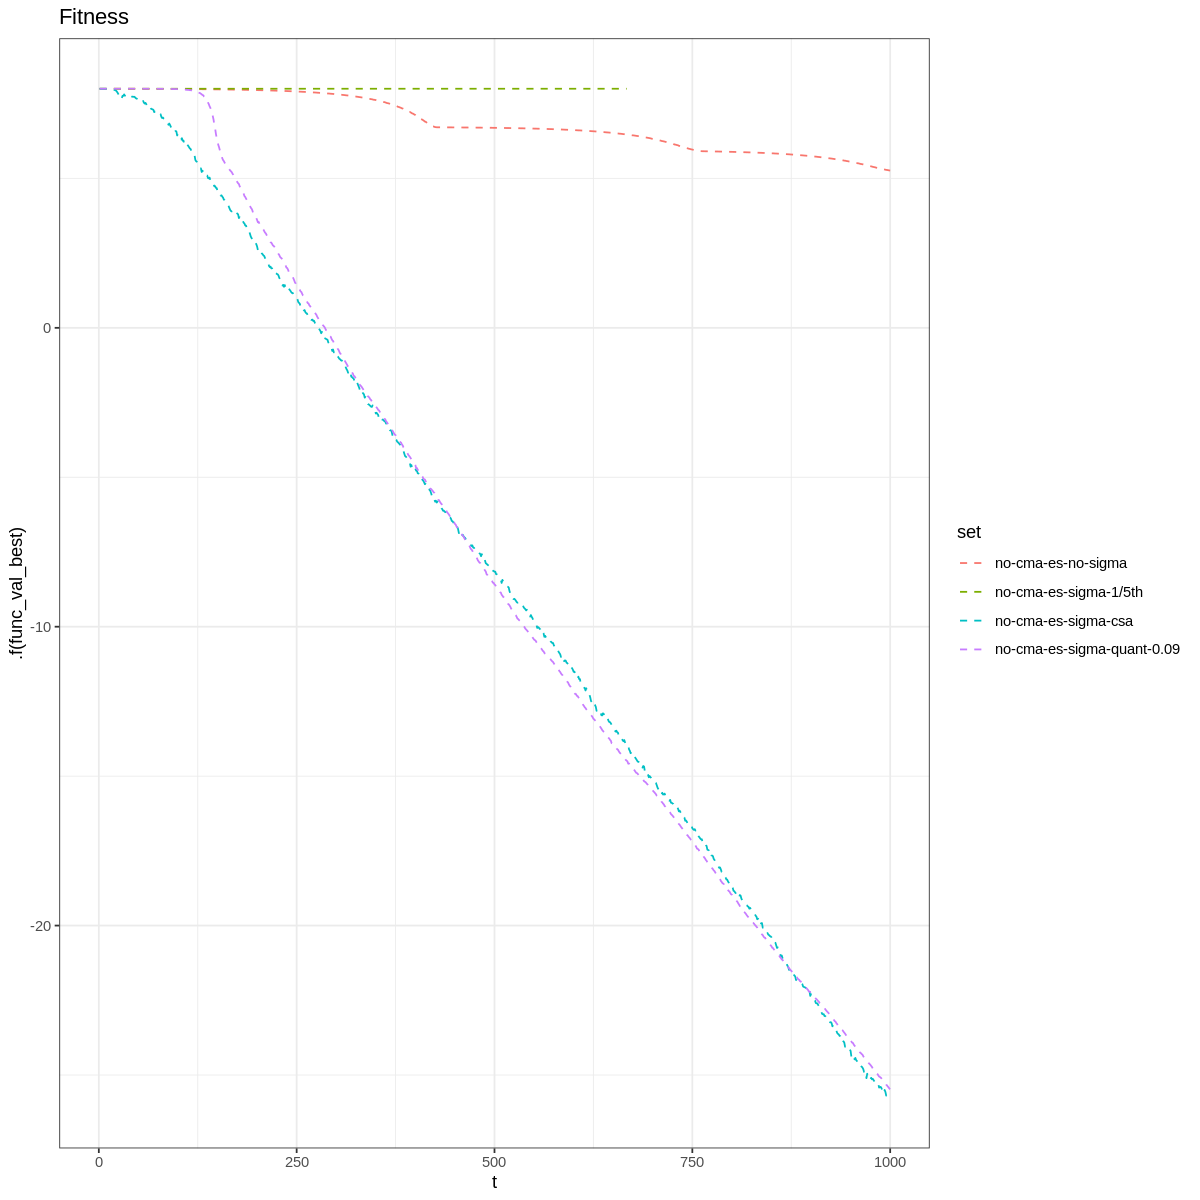

In [92]:
sphere_eval50 %>% value_plot()
sphere_eval100 %>% value_plot(.f=log10)

### Funkcja liniowa $q(x) = x_1$

Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message in FUN(X[[i]], ...):
“NaNs produced”
Warning message:
“Removed 599 row(s) containing missing values (geom_path).”


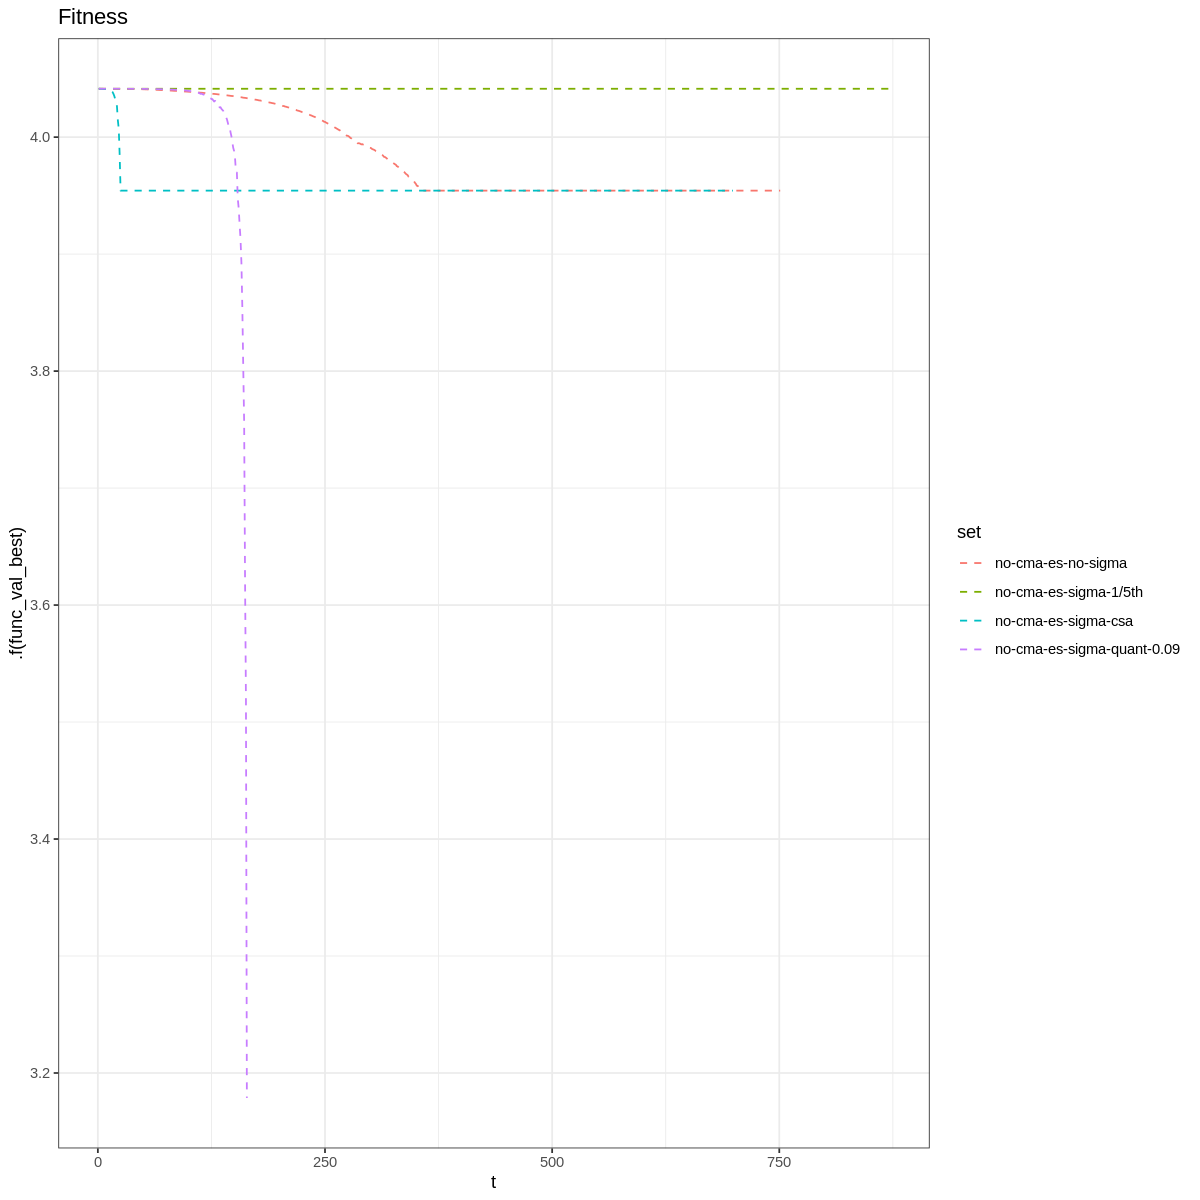

In [104]:
#value_plot() 
linear_eval100 %>% mutate(func_val_best = func_val_best + 10000) %>% value_plot(.f=log10) 

## Strojenie reguły kwantylowej (f-cja sferyczna)

In [19]:
sphere_q %>%  value_plot() + xlim(0, 100)
sphere_q %>%  value_plot(.f=log10)

ERROR: Error in eval(lhs, parent, parent): object 'sphere_q' not found


## Ratio best vs mean (czerwona linia pozioma: mediana, niebieska linia pozioma: $y = 1$)

### Funkcja gutter

Warning message:
“Removed 40 rows containing missing values (geom_point).”


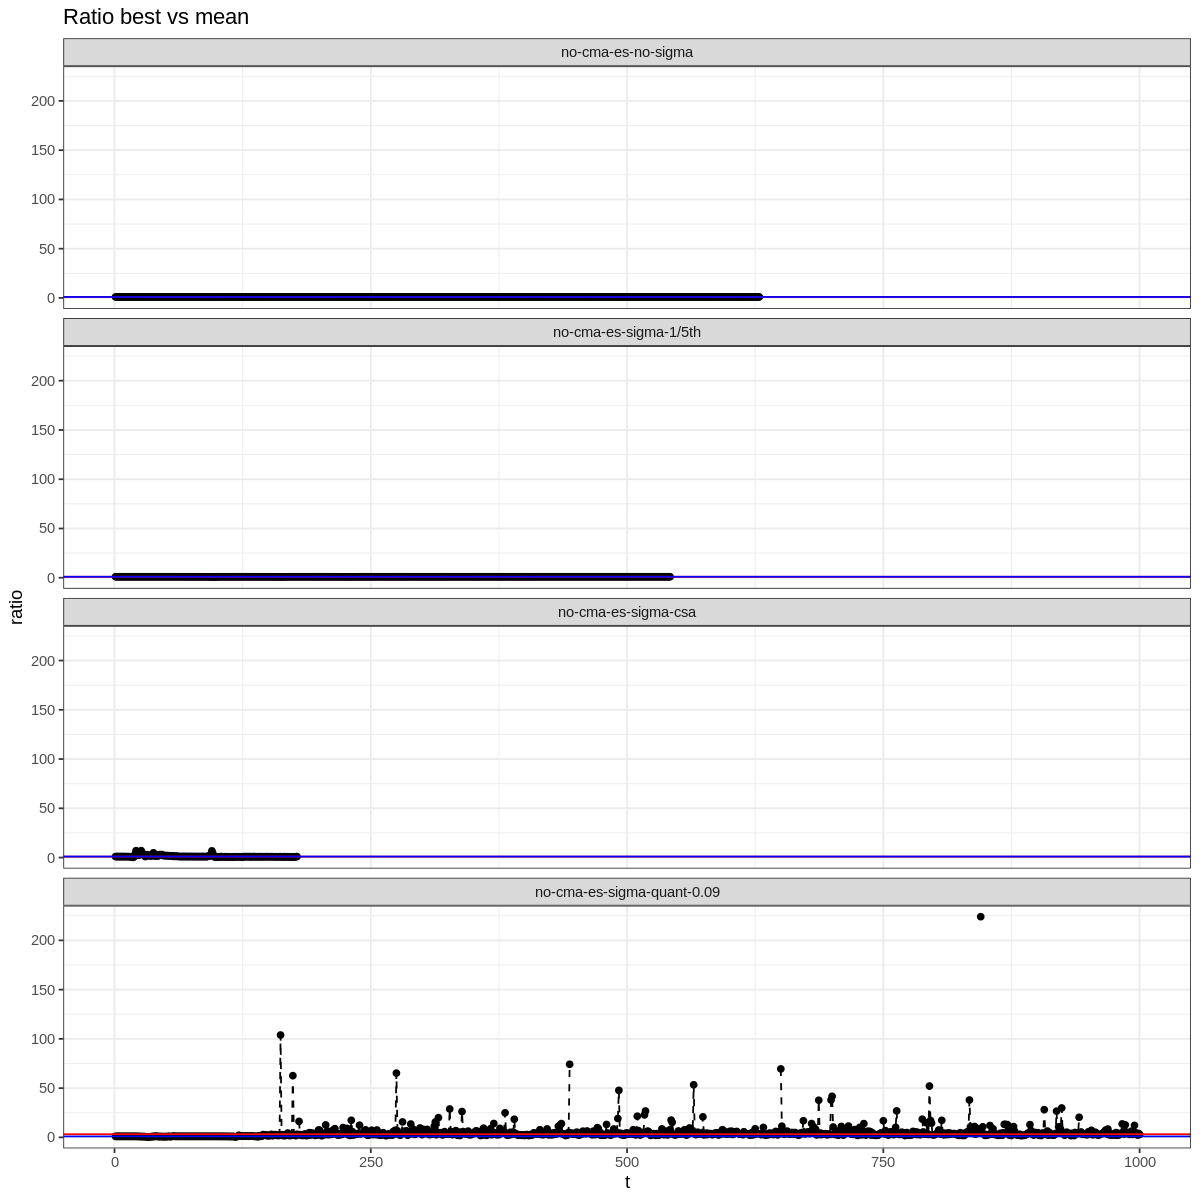

In [20]:
gutter_eval %>% ratio_plot()

### Funkcja sferyczna

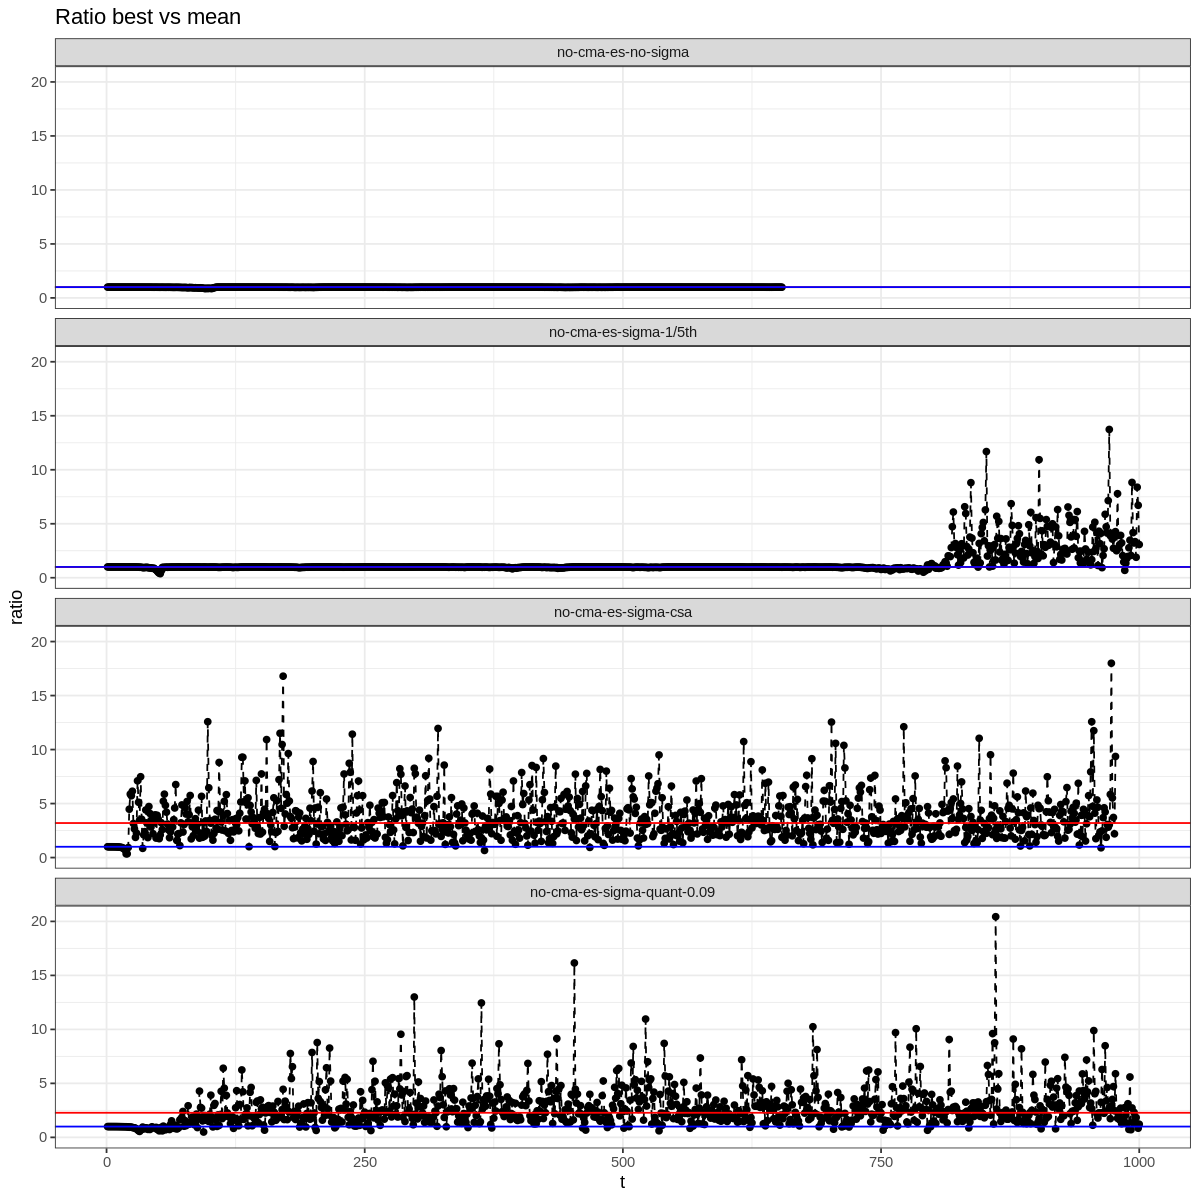

In [21]:
sphere_eval %>% ratio_plot()

### Funkcja liniowa

Warning message:
“Removed 6 rows containing missing values (geom_point).”


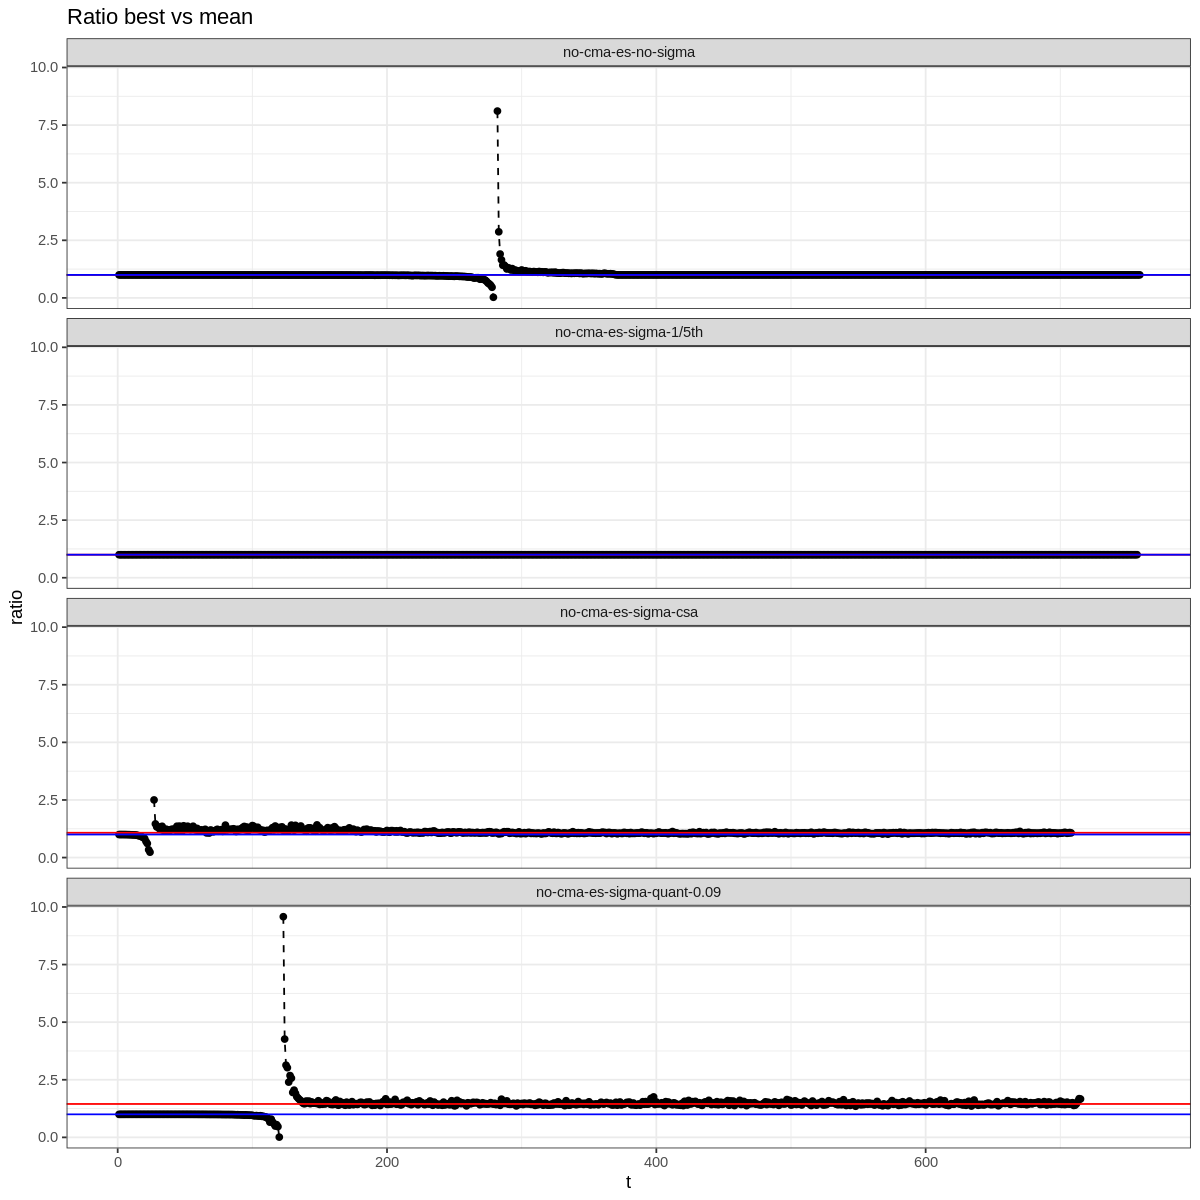

In [22]:
linear_eval %>% ratio_plot()

## Kwantyl przystosowania punktu środkowego w populacji CMA-ES-SIGMA-QUANT

In [25]:
repetitions = 10

### Funkcja gutter

In [26]:
results = 
  main(10, gutter_func, no_cma_es_sigma_quant, -1, 1000, repetitions)

In [27]:
summary_result = 
  1:repetitions %>%
  purrr::map(function(iter) {
    results[[iter]]$df %>% 
      dplyr::summarize(mean_ave = mean(mean_q),
                       mean_min = min(mean_q),
                       mean_max = max(mean_q))
    }) %>%
  purrr::reduce(dplyr::bind_rows) %>%
  dplyr::mutate(t = 1:dplyr::n())

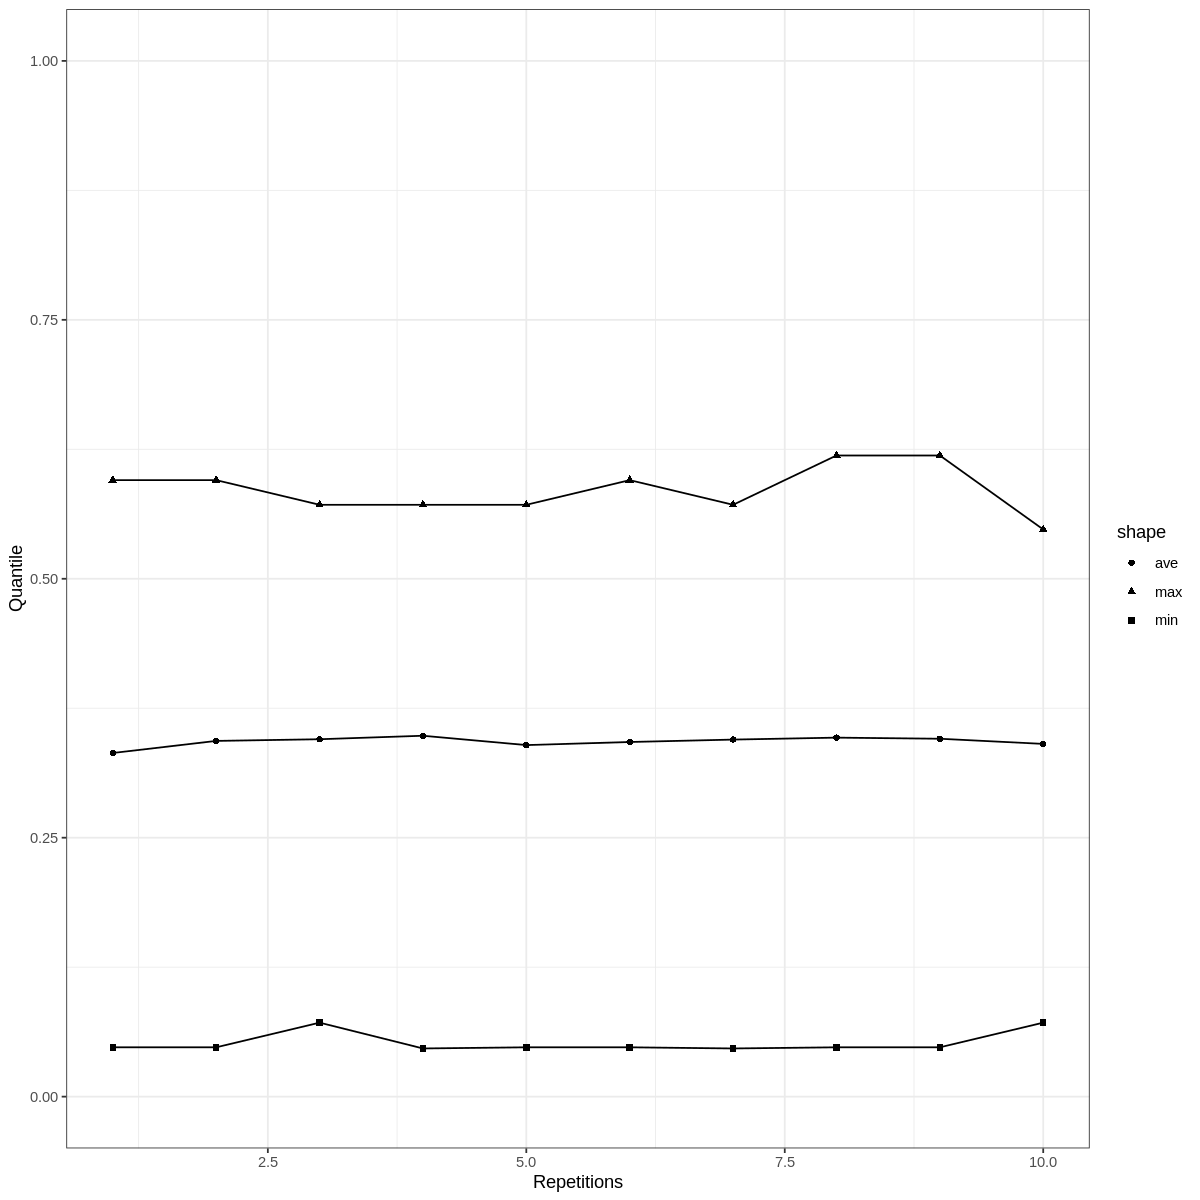

In [28]:
summary_result %>% 
    quantile_plot("mean") + ylim(0, 1)

Warning message:
“`as.tibble()` is deprecated, use `as_tibble()` (but mind the new semantics).
This warning is displayed once per session.”


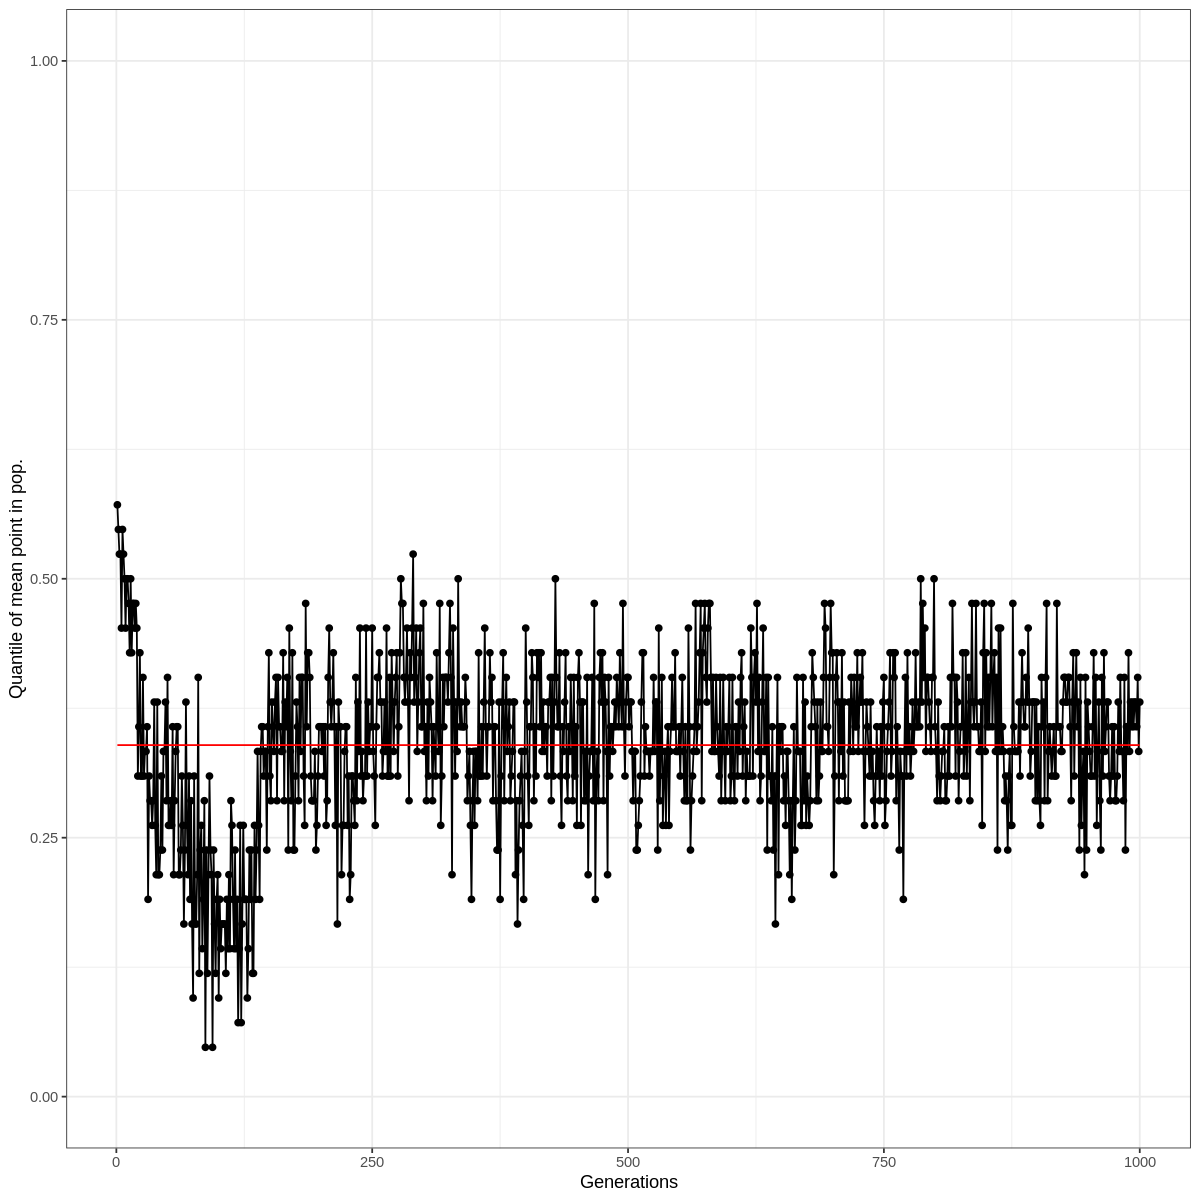

In [29]:
results[[5]] %>% quantileGens_plot()

### Funkcja sferyczna

In [31]:
results = 
  main(10, sphere_func, no_cma_es_sigma_quant, -1, 1000, repetitions)

In [32]:
summary_result = 
  1:repetitions %>%
  purrr::map(function(iter) {
    results[[iter]]$df %>% 
      dplyr::summarize(mean_ave = mean(mean_q),
                       mean_min = min(mean_q),
                       mean_max = max(mean_q))
    }) %>%
  purrr::reduce(dplyr::bind_rows) %>%
  dplyr::mutate(t = 1:dplyr::n())

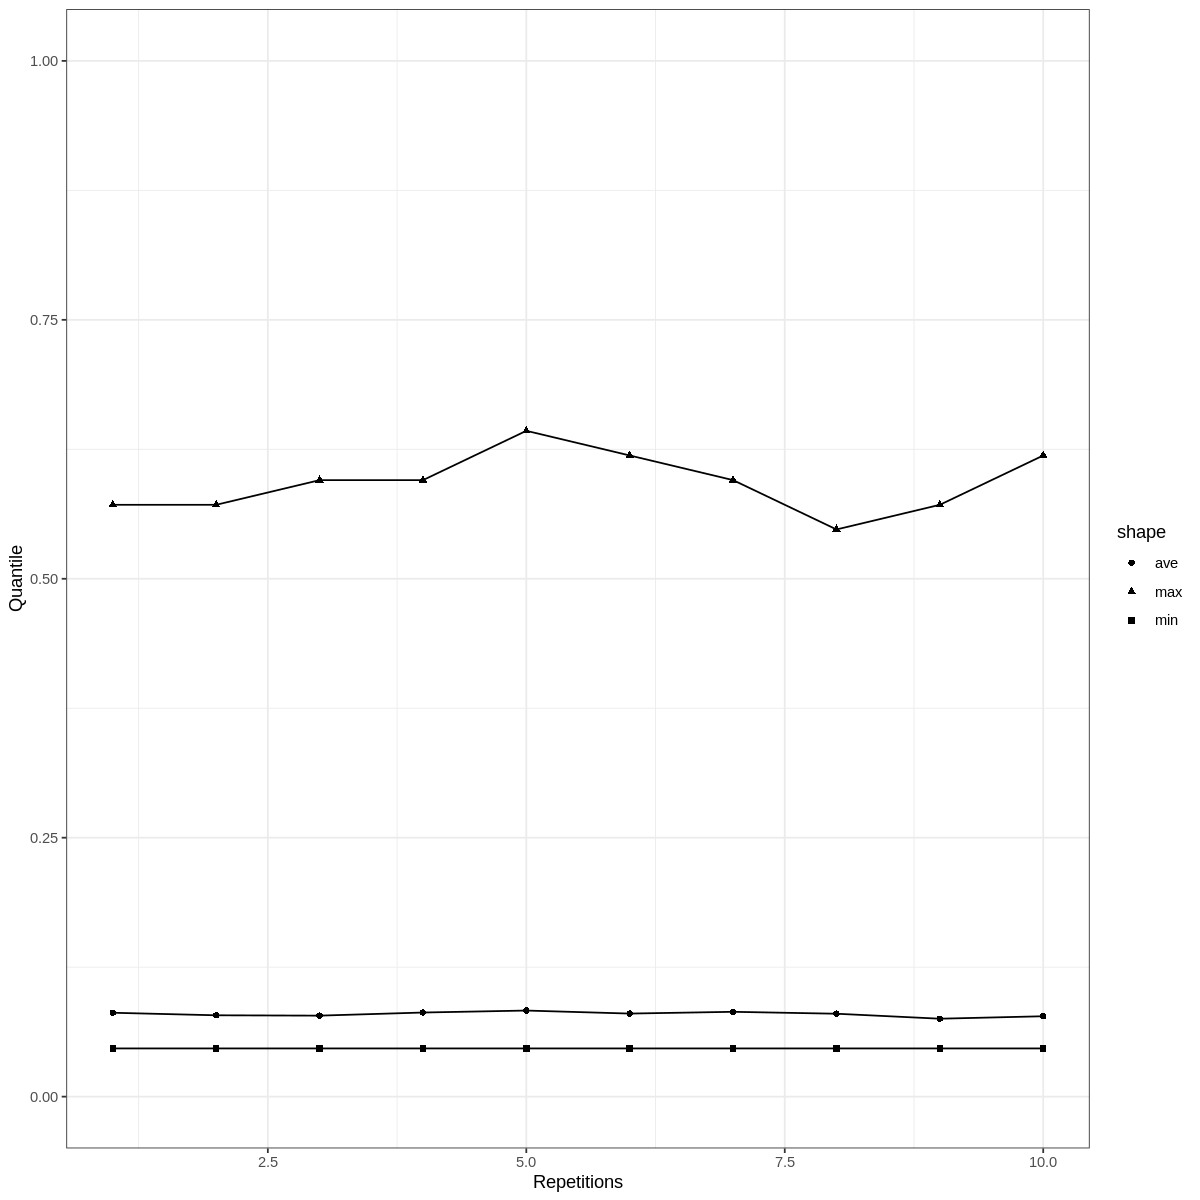

In [33]:
summary_result %>% 
    quantile_plot("mean") + ylim(0, 1)

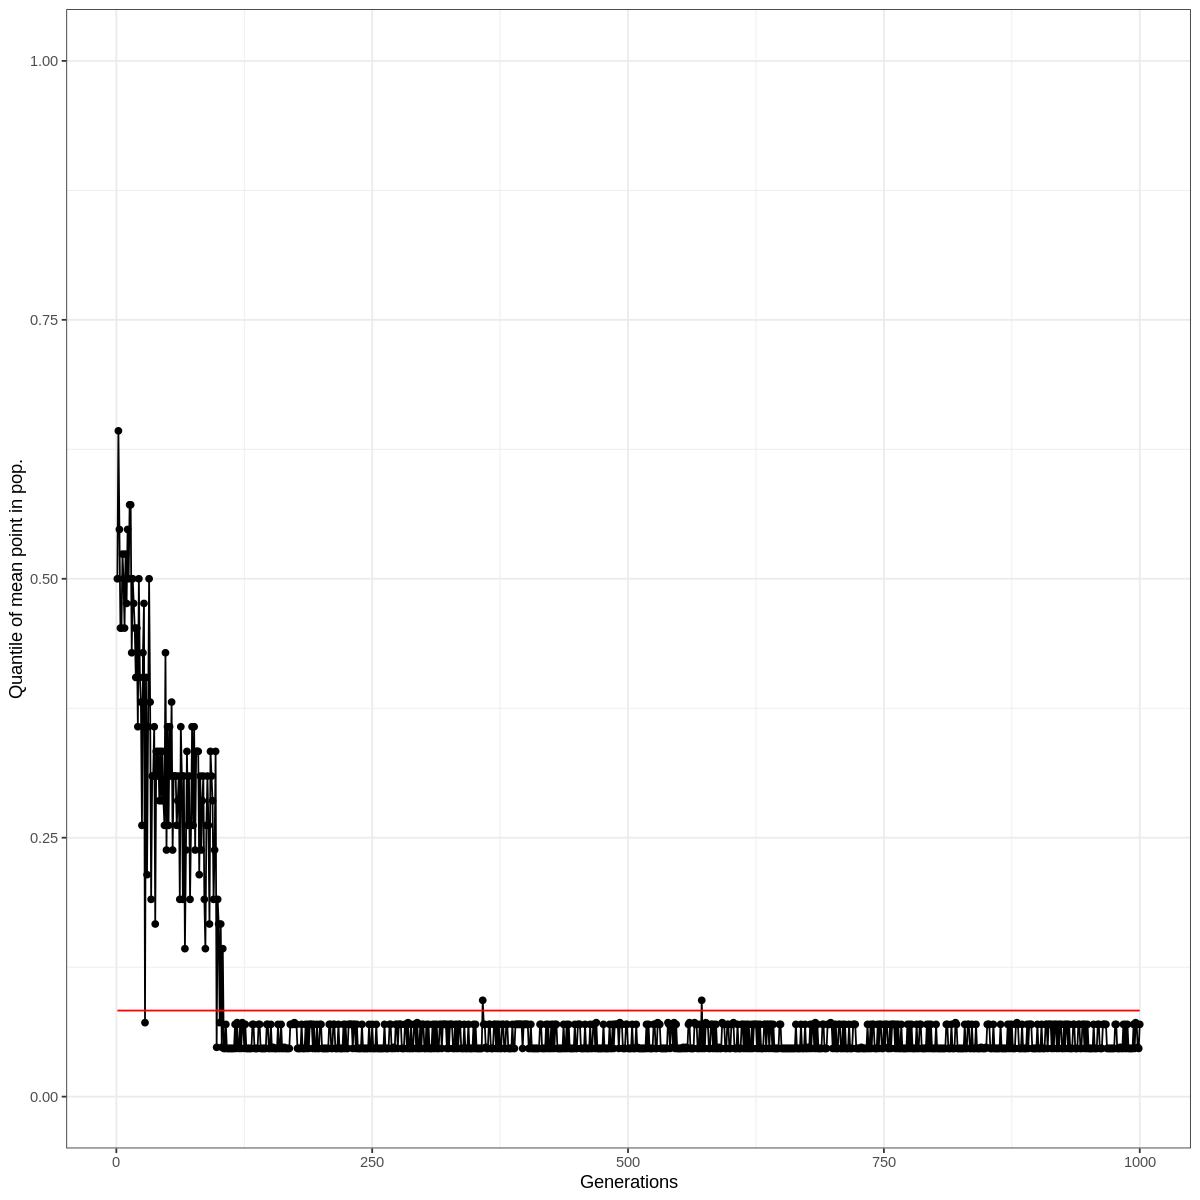

In [34]:
results[[5]] %>% quantileGens_plot()

### Funkcja liniowa

In [36]:
results = 
  main(10, linear_func, no_cma_es_sigma_quant, -1, 1000, repetitions)

In [37]:
summary_result = 
  1:repetitions %>%
  purrr::map(function(iter) {
    results[[iter]]$df %>% 
      dplyr::summarize(mean_ave = mean(mean_q),
                       mean_min = min(mean_q),
                       mean_max = max(mean_q))
    }) %>%
  purrr::reduce(dplyr::bind_rows) %>%
  dplyr::mutate(t = 1:dplyr::n())

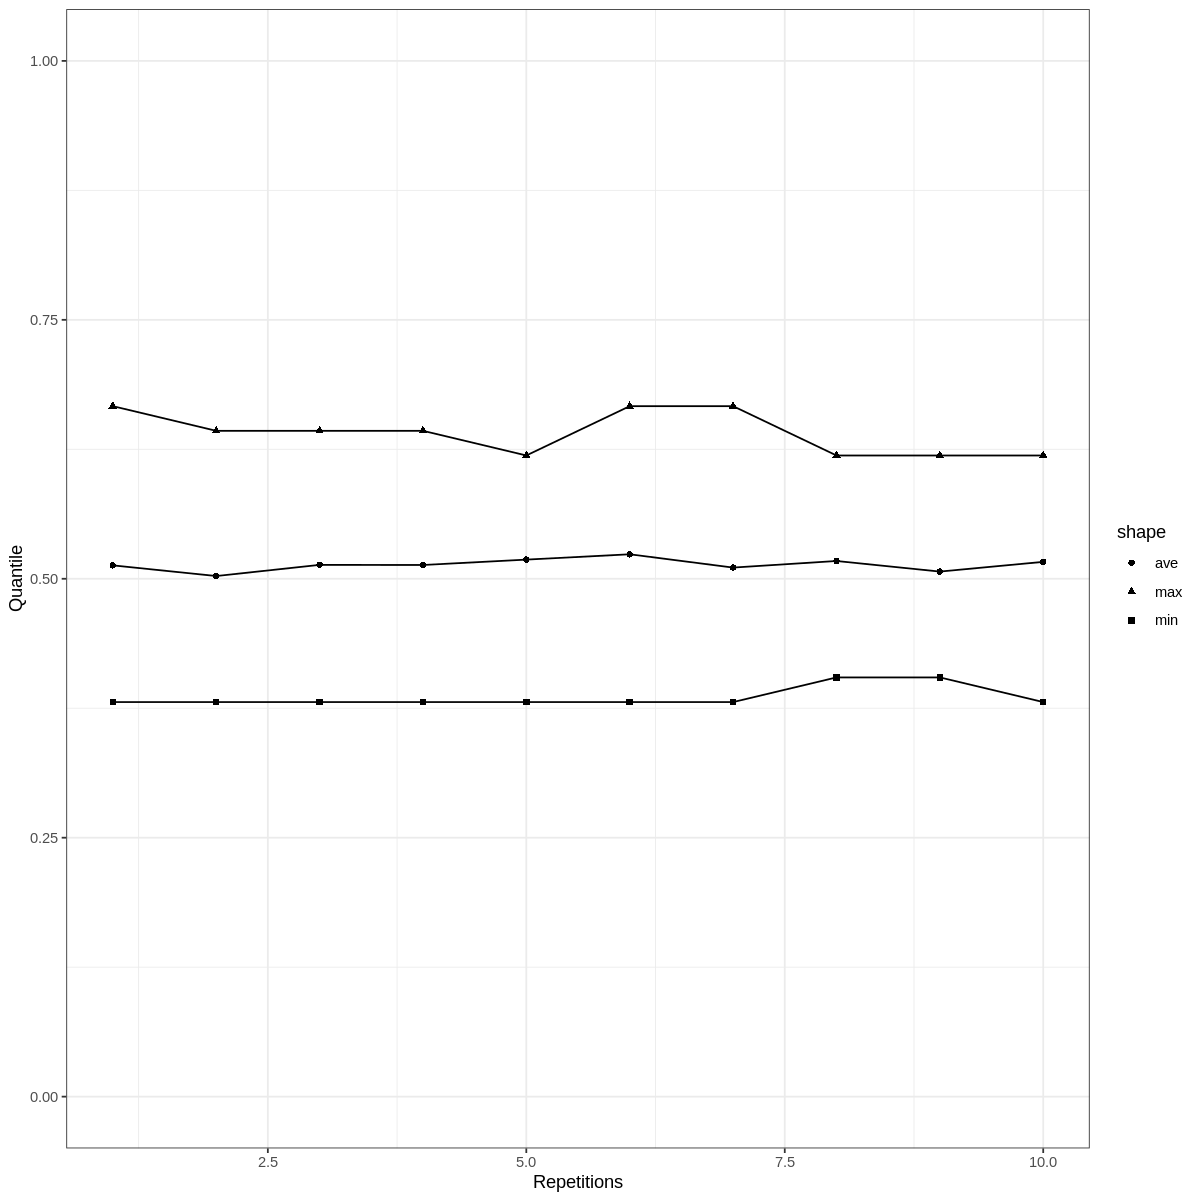

In [38]:
summary_result %>% 
    quantile_plot("mean") + ylim(0, 1)

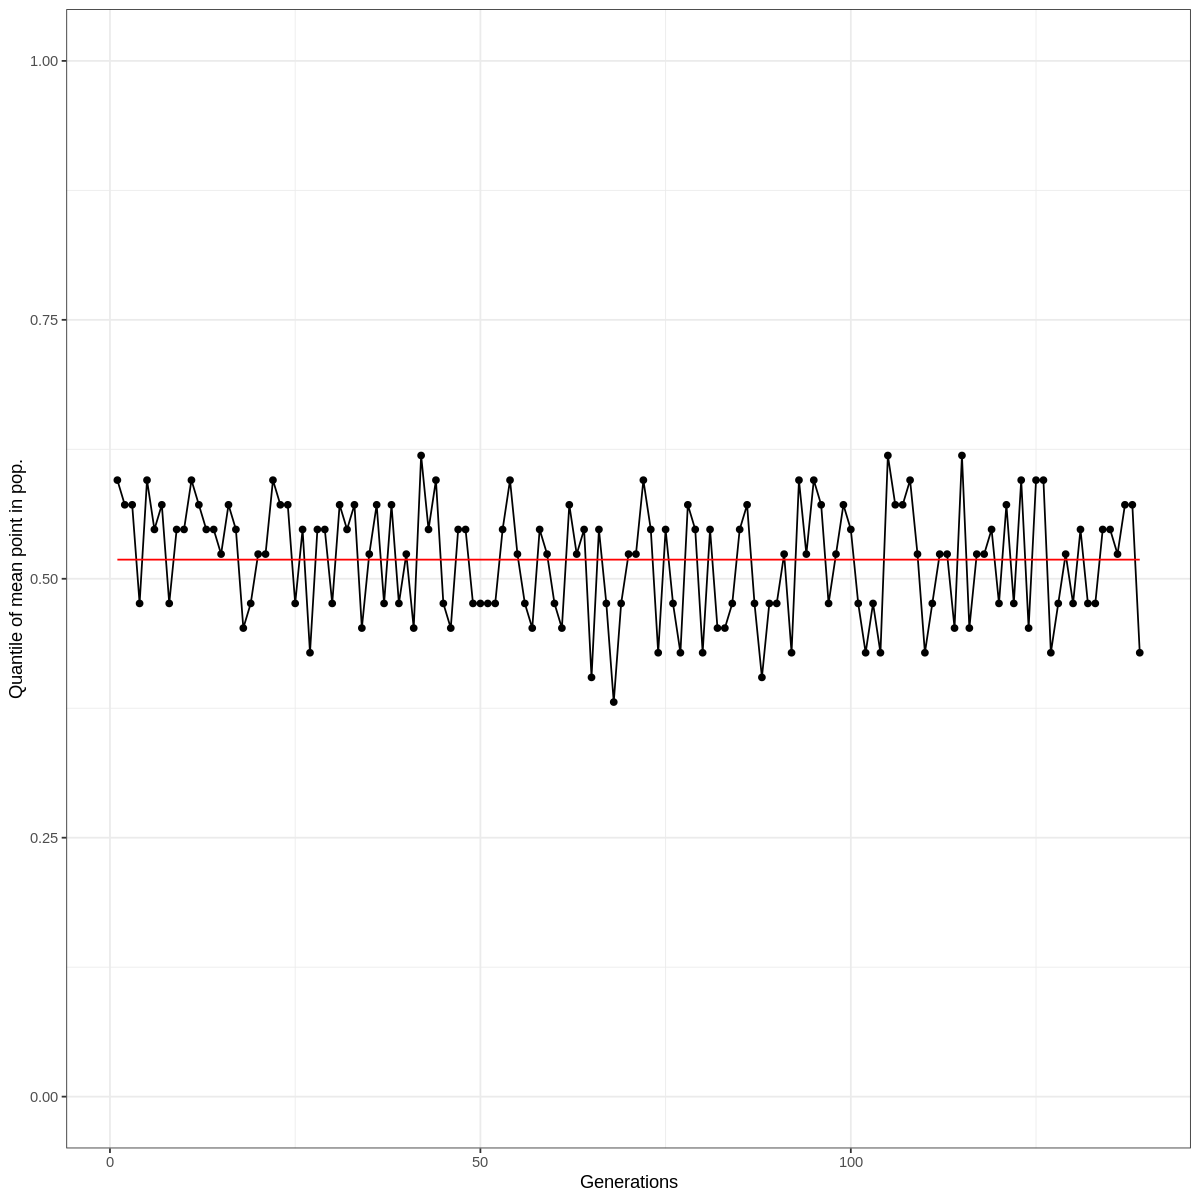

In [39]:
results[[5]] %>% quantileGens_plot()